In [ ]:
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as pp

In [7]:
ancho = 27
alto = 13

# Tensor de ceros con 3 canales (RGB), alto y ancho especificados y tipo uint8
lienzo = torch.zeros((3, alto, ancho), dtype=torch.uint8) 
lienzo.size()

torch.Size([3, 13, 27])

# Conversion de un tensor a una imagen

In [10]:
lienzo.device

device(type='cpu')

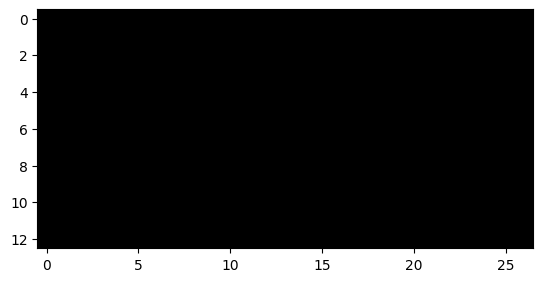

In [11]:
# Convierte el tensor de PyTorch en un arreglo de NumPy.
lienzo_np = lienzo.cpu().numpy()

# Pytroch usa (C, H, W) → canales, alto, ancho
# Matplotlib usa (H, W, C) → alto, ancho, canales

# Transpone el arreglo, cambiando el orden de los ejes
# Transponer de canales, filas, columnas a filas, columnas, canales
lienzo_np = np.transpose(lienzo_np, (1, 2, 0))

# Muestra la imagen usando Matplotlib
pp.imshow(lienzo_np)
pp.show()

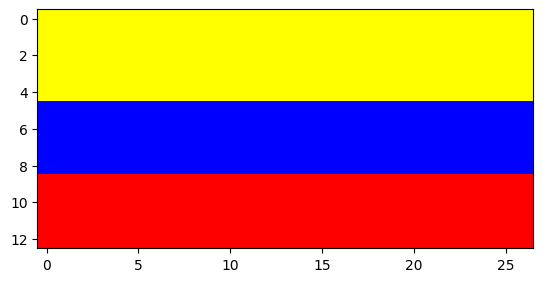

In [18]:
tam = lienzo.size()
for i in range(0, tam[1]):      # filas:    y
    for j in range(0, tam[2]):  # columnas: x

        if i < 5:               # Para las filas de 0 a 4
            lienzo[:, i, j] = torch.tensor([255.0, 255.0, 0.0], dtype=torch.uint8)   # Banda amarilla
        elif i < 9:
            lienzo[:, i, j] = torch.tensor([0.0, 0.0, 255.0], dtype=torch.uint8)     # Banda azul
        else:
            lienzo[:, i, j] = torch.tensor([255.0, 0.0, 0.0], dtype=torch.uint8)     # Banda roja

pp.imshow(lienzo.permute(1, 2, 0).numpy())
pp.show()

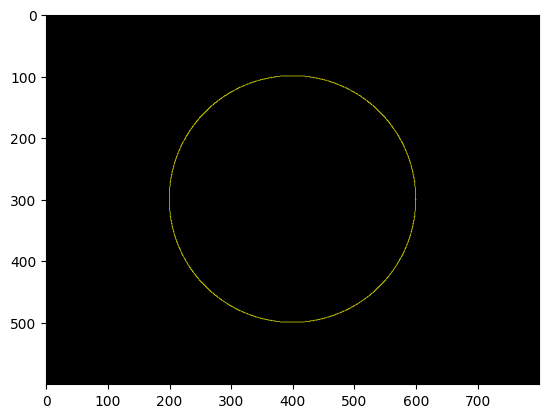

In [23]:
alto = 600
ancho = 800

# Tensor lienzo vacío, con 3 canales, alto y ancho especifcados y float32 como tipo de dato
tensor_ecuacion = torch.zeros((3, alto, ancho), dtype=torch.float32)
tam = tensor_ecuacion.size() # (3, 600, 800)

PASO = 0.001 # Paso con el que se incrementa el ángulo
cx = float(tam[2]) / 2.0  # Centro X, 800 / 2 = 400
cy = float(tam[1]) / 2.0  # Centro Y, 600 / 2 = 300
r = 200.0 # Radio

for angulo in np.arange(0, 2*np.pi, PASO): # Valores desde 0 hasta 2π a paso de 0.01
    x = r * np.cos(angulo) + cx  # Sumar cx para centrar
    y = r * np.sin(angulo) + cy  # Sumar cy para centrar
    
    # Verificar que las coordenadas estén dentro de los límites
    if 0 <= int(y) < alto and 0 <= int(x) < ancho:
        # Asigna un color RGB = (1, 1, 0) → amarillo.
        tensor_ecuacion[:, int(y), int(x)] = torch.tensor([1.0, 1.0, 0.0], dtype=torch.float32)

# permute(1,2,0) cambia el orden de los ejes y se convierte a NumPy para que imshow pueda visualizarlo.
tensor_ecuacion = tensor_ecuacion.permute(1, 2, 0).numpy()
pp.imshow(tensor_ecuacion)
pp.show()

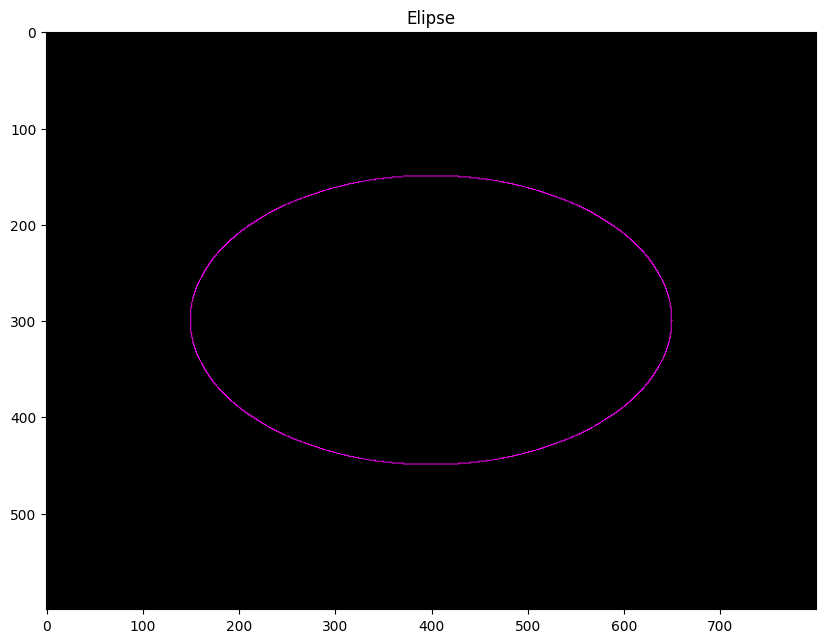

In [29]:
# ELIPSE
# x = a*cos(t), y = b*sin(t)
ancho = 800
alto = 600
tensor_elipse = torch.zeros((3, alto, ancho), dtype=torch.float32)

PASO = 0.001
cx = float(ancho) / 2.0  # Centro X
cy = float(alto) / 2.0  # Centro Y
a = 250.0  # Semi-eje mayor (horizontal)
b = 150.0  # Semi-eje menor (vertical)

for angulo in np.arange(0, 2*np.pi, PASO):
    x = a * np.cos(angulo) + cx
    y = b * np.sin(angulo) + cy
    
    if 0 <= int(y) < alto and 0 <= int(x) < ancho:
        tensor_elipse[:, int(y), int(x)] = torch.tensor([1.0, 0.0, 1.0], dtype=torch.float32) 

tensor_elipse = tensor_elipse.permute(1, 2, 0).numpy()
pp.figure(figsize=(10, 7.5))
pp.imshow(tensor_elipse)
pp.title('Elipse')
pp.show()

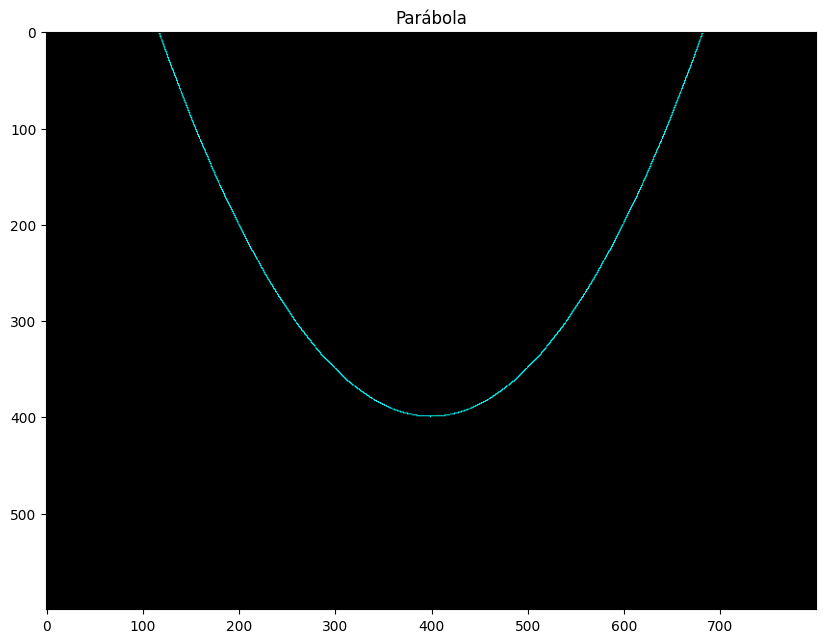

In [26]:
# PARÁBOLA
# y = a*x^2
ancho = 800
alto = 600
tensor_parabola = torch.zeros((3, alto, ancho), dtype=torch.float32)

cx = float(ancho) / 2
cy = float(alto) / 1.5
a = 0.005  # Coeficiente de la parábola

# Recorremos valores de x
for x in np.arange(-300, 300, 0.001):
    y = a * (x ** 2)
    
    px = int(x + cx)
    py = int(-y + cy)  # Negativo para que la parábola abra hacia arriba visualmente
    
    if 0 <= py < alto and 0 <= px < ancho:
        tensor_parabola[:, py, px] = torch.tensor([0.0, 1.0, 1.0], dtype=torch.float32)  # Color cyan

tensor_parabola = tensor_parabola.permute(1, 2, 0).numpy()
pp.figure(figsize=(10, 7.5))
pp.imshow(tensor_parabola)
pp.title('Parábola')
pp.show()

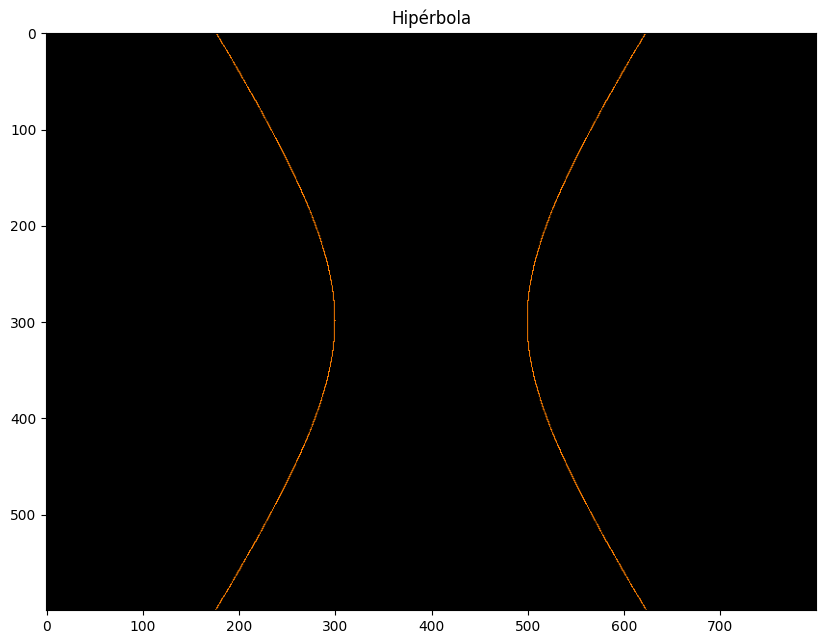

In [27]:
# HIPÉRBOLA
# x = a*sec(t), y = b*tan(t)
# x = a*cosh(t), y = b*sinh(t)
ancho = 800
alto = 600
tensor_hiperbola = torch.zeros((3, alto, ancho), dtype=torch.float32)

cx = float(ancho) / 2.0
cy = float(alto) / 2.0
a = 100.0  # Parámetro a de la hipérbola
b = 150.0  # Parámetro b de la hipérbola

# Rama derecha e izquierda usando funciones hiperbólicas
for t in np.arange(-3, 3, 0.001):
    # Rama derecha
    x1 = a * np.cosh(t) + cx
    y1 = b * np.sinh(t) + cy
    
    if 0 <= int(y1) < alto and 0 <= int(x1) < ancho:
        tensor_hiperbola[:, int(y1), int(x1)] = torch.tensor([1.0, 0.5, 0.0], dtype=torch.float32)  # Color naranja
    
    # Rama izquierda
    x2 = -a * np.cosh(t) + cx
    y2 = b * np.sinh(t) + cy
    
    if 0 <= int(y2) < alto and 0 <= int(x2) < ancho:
        tensor_hiperbola[:, int(y2), int(x2)] = torch.tensor([1.0, 0.5, 0.0], dtype=torch.float32)  # Color naranja

tensor_hiperbola = tensor_hiperbola.permute(1, 2, 0).numpy()
pp.figure(figsize=(10, 7.5))
pp.imshow(tensor_hiperbola)
pp.title('Hipérbola')
pp.show()

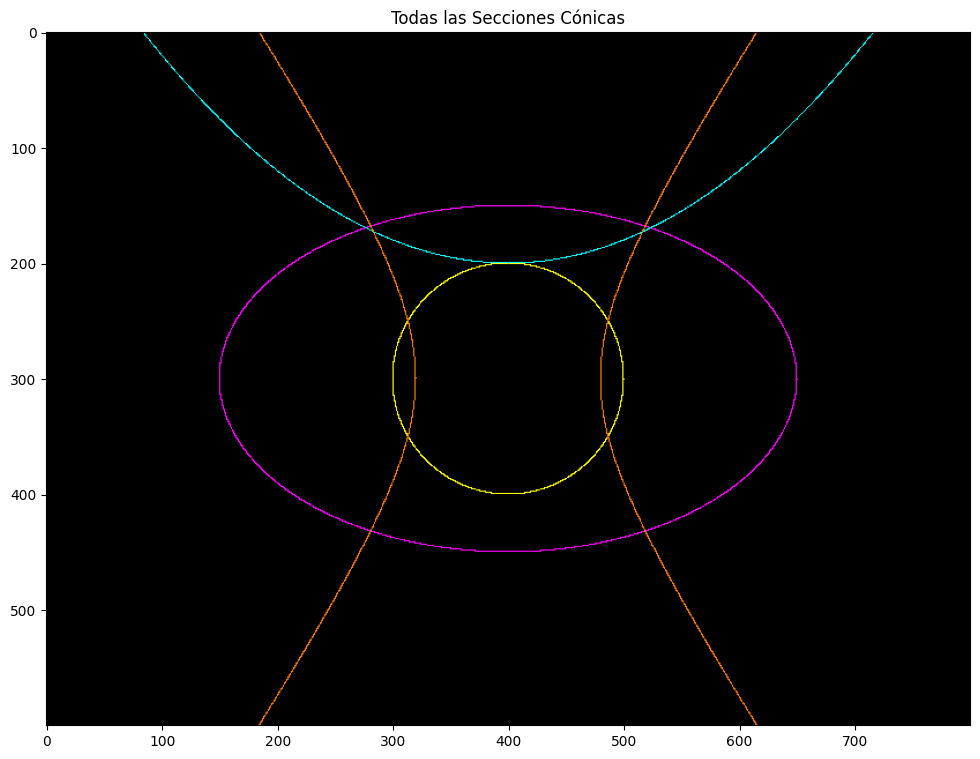

In [28]:
# TODAS LAS CÓNICAS JUNTAS
ancho = 800
alto = 600
tensor_todas = torch.zeros((3, alto, ancho), dtype=torch.float32)

cx = float(ancho) / 2.0
cy = float(alto) / 2.0

# Círculo (amarillo)
r = 100.0
for angulo in np.arange(0, 2*np.pi, 0.001):
    x = r * np.cos(angulo) + cx
    y = r * np.sin(angulo) + cy
    if 0 <= int(y) < alto and 0 <= int(x) < ancho:
        tensor_todas[:, int(y), int(x)] = torch.tensor([1.0, 1.0, 0.0], dtype=torch.float32)

# Elipse (magenta)
a_elipse = 250.0
b_elipse = 150.0
for angulo in np.arange(0, 2*np.pi, 0.001):
    x = a_elipse * np.cos(angulo) + cx
    y = b_elipse * np.sin(angulo) + cy
    if 0 <= int(y) < alto and 0 <= int(x) < ancho:
        tensor_todas[:, int(y), int(x)] = torch.tensor([1.0, 0.0, 1.0], dtype=torch.float32)

# Parábola (cyan)
a_parabola = 0.002
for x in np.arange(-350, 350, 0.5):
    y = a_parabola * (x ** 2)
    px = int(x + cx)
    py = int(-y + cy - 100)  # Desplazada hacia abajo
    if 0 <= py < alto and 0 <= px < ancho:
        tensor_todas[:, py, px] = torch.tensor([0.0, 1.0, 1.0], dtype=torch.float32)

# Hipérbola (naranja)
a_hip = 80.0
b_hip = 120.0
for t in np.arange(-3, 3, 0.001):
    # Rama derecha
    x1 = a_hip * np.cosh(t) + cx
    y1 = b_hip * np.sinh(t) + cy
    if 0 <= int(y1) < alto and 0 <= int(x1) < ancho:
        tensor_todas[:, int(y1), int(x1)] = torch.tensor([1.0, 0.5, 0.0], dtype=torch.float32)
    # Rama izquierda
    x2 = -a_hip * np.cosh(t) + cx
    y2 = b_hip * np.sinh(t) + cy
    if 0 <= int(y2) < alto and 0 <= int(x2) < ancho:
        tensor_todas[:, int(y2), int(x2)] = torch.tensor([1.0, 0.5, 0.0], dtype=torch.float32)

tensor_todas = tensor_todas.permute(1, 2, 0).numpy()
pp.figure(figsize=(12, 9))
pp.imshow(tensor_todas)
pp.title('Todas las Secciones Cónicas')
pp.show()

## Deteccion de bordes

- Por tanto, la derivada en PDI se interpreta como:
    - El cambio de intensidad entre píxeles vecinos.

- Gradiente sqrt(Gx**2 Gy**2) <- Intensidad del cambio
- theta = arcTan(Gy / Gx) <- Hacia donde se dirige
- Calcular la magnitud del gradiente y el angulo
    - Primero detector en X, luego detector en Y

### Detector de Sobel

- Kernel:
    - Bordes Horizontales
        1 0 -1 
        2 0 -2
        1 0 -1
